In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

from tabulate import tabulate

In [3]:
df = pd.read_csv("Datasets/euroweight.csv")

conditions = [pd.Series([True] * len(df), index=df.index)] + [df["Batch"] == i for i in range(1, 8+1)]

labels = ["All batches"] + [f"Batch {i}" for i in range(1, 8+1)]

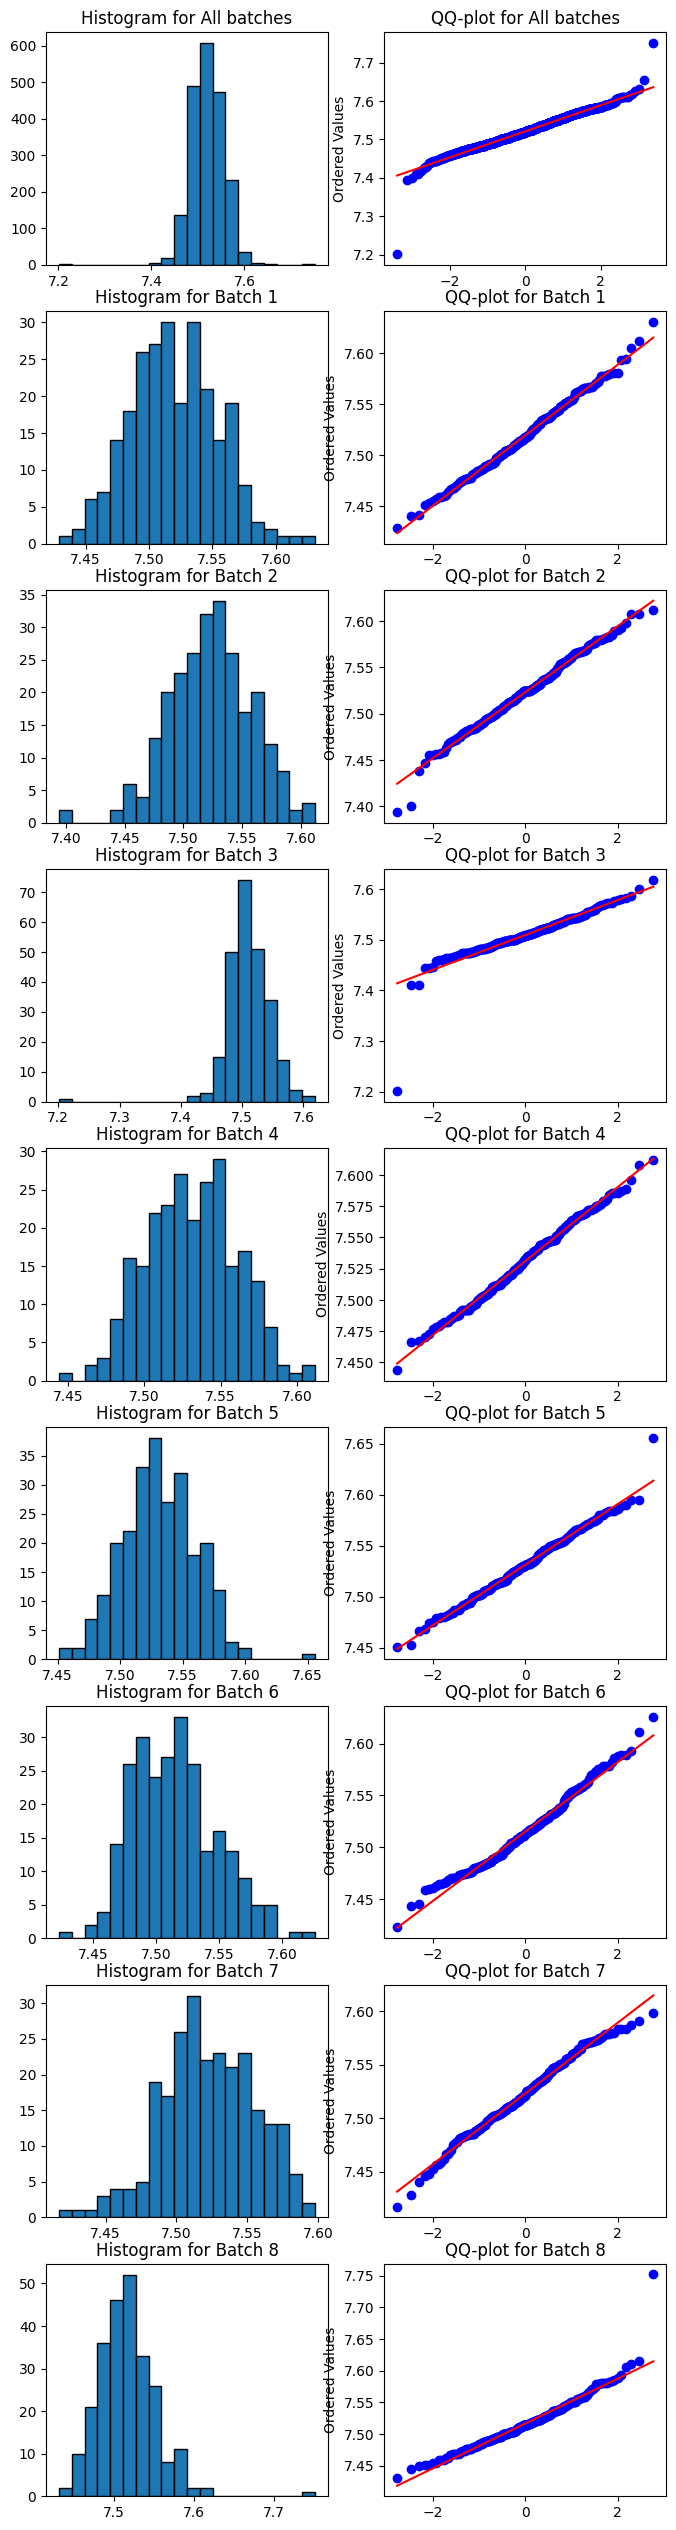

In [4]:
# Graphical verification of assumptions about normality
# For that purpose histograms and qq-plots are built

fig, axes = plt.subplots(nrows=len(labels), ncols=2, figsize=(8, 32))

for i in range(len(labels)):
    data = df[conditions[i]]["Weight"]
    # Histogram
    n, bins, patches = axes[i, 0].hist(data, bins=20, edgecolor="black")
    axes[i, 0].set_title(f"Histogram for {labels[i]}")
    # QQ-plot
    stats.probplot(data, dist="norm", plot=axes[i, 1])
    axes[i, 1].set_title(f"QQ-plot for {labels[i]}")
    axes[i, 1].set_xlabel("")

In [5]:
# Confidence intervals for the parameters of the normal distribution
confidence = 0.95
alpha = 1 - confidence

table = []

for i in range(len(labels)):
    line = [labels[i]]

    data = df[conditions[i]]["Weight"]
    n = len(data)
    std = data.std()
    mean = data.mean()
    
    # confidence interval for mean
    t = stats.t.ppf(1 - alpha/2, df=n-1)
    mean_ci = (
        round((mean - t * std / np.sqrt(n)).item(), 4), 
        round((mean + t * std / np.sqrt(n)).item(), 4),
    )
    line.append(mean_ci)

    # confidence interval for standard deviation
    hi2_lower = stats.chi2.ppf(alpha/2, df=n-1)
    hi2_upper = stats.chi2.ppf(1 - alpha/2, df=n-1)
    std_ci = (
        round(np.sqrt((n-1)*std**2/hi2_upper).item(), 4),
        round(np.sqrt((n-1)*std**2/hi2_lower).item(), 4),
    )
    line.append(std_ci)

    table.append(line)

print(tabulate(table, headers=["", "Mean", "Standard deviation"], tablefmt="fancy_grid"))

╒═════════════╤══════════════════╤══════════════════════╕
│             │ Mean             │ Standard deviation   │
╞═════════════╪══════════════════╪══════════════════════╡
│ All batches │ (7.5197, 7.5227) │ (0.0333, 0.0355)     │
├─────────────┼──────────────────┼──────────────────────┤
│ Batch 1     │ (7.5154, 7.5239) │ (0.0316, 0.0377)     │
├─────────────┼──────────────────┼──────────────────────┤
│ Batch 2     │ (7.5187, 7.5276) │ (0.0326, 0.0389)     │
├─────────────┼──────────────────┼──────────────────────┤
│ Batch 3     │ (7.5049, 7.5142) │ (0.0341, 0.0406)     │
├─────────────┼──────────────────┼──────────────────────┤
│ Batch 4     │ (7.5274, 7.5348) │ (0.027, 0.0322)      │
├─────────────┼──────────────────┼──────────────────────┤
│ Batch 5     │ (7.5277, 7.5351) │ (0.0272, 0.0325)     │
├─────────────┼──────────────────┼──────────────────────┤
│ Batch 6     │ (7.5111, 7.5194) │ (0.0307, 0.0366)     │
├─────────────┼──────────────────┼──────────────────────┤
│ Batch 7     

In [ ]:
# Testing hypotheses about the normal distribution (Shapiro test)
confidence = 0.95
alpha = 1 - confidence

table = []

for i in range(len(labels)):
    line = [labels[i]]

    data = df[conditions[i]]["Weight"]
    std_data = (data - data.mean()) / data.std()
    statistic, p_value = stats.shapiro(std_data)
    line.append(statistic)
    line.append(p_value)

    if p_value > alpha:
        line.append("Yes")
    else:
        line.append("No")
    
    table.append(line)

print(tabulate(table, headers=["", "Statistic", "P-value", "Is normally distributed"], tablefmt="fancy_grid"))

╒═════════════╤═════════════╤═════════════╤═══════════════════════════╕
│             │   Statistic │     P-value │ Is normally distributed   │
╞═════════════╪═════════════╪═════════════╪═══════════════════════════╡
│ All batches │    0.975473 │ 5.02328e-18 │ No                        │
├─────────────┼─────────────┼─────────────┼───────────────────────────┤
│ Batch 1     │    0.995507 │ 0.683002    │ Yes                       │
├─────────────┼─────────────┼─────────────┼───────────────────────────┤
│ Batch 2     │    0.9909   │ 0.121877    │ Yes                       │
├─────────────┼─────────────┼─────────────┼───────────────────────────┤
│ Batch 3     │    0.863432 │ 4.08944e-14 │ No                        │
├─────────────┼─────────────┼─────────────┼───────────────────────────┤
│ Batch 4     │    0.995505 │ 0.682659    │ Yes                       │
├─────────────┼─────────────┼─────────────┼───────────────────────────┤
│ Batch 5     │    0.991034 │ 0.128993    │ Yes                 